# **Сравнение методов классификации**

In [57]:
import pandas as pd
# Загрузка данных
file_path = "C:\\Users\\Ангелина\\winequality-red.csv"
data = pd.read_csv(file_path)

# Просмотр первых строк
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Описание датасета
Датасет содержит информацию о химических характеристиках красного вина, а также оценку его качества.
### Независимые переменные (признаки):
- `fixed acidity`: фиксированная кислотность, связана с вкусовыми характеристиками вина.
- `volatile acidity`: летучая кислотность, влияет на аромат и вкус; высокая кислотность может ухудшить качество.
- `citric acid`: лимонная кислота, добавляет свежесть и структуру вину.
- `residual sugar`: остаточный сахар, отвечает за сладость вина.
- `chlorides`: содержание хлоридов, индикатор солености вина.
- `free sulfur dioxide`: свободный диоксид серы, предотвращает окисление и рост бактерий.
- `total sulfur dioxide`: общий диоксид серы, комбинация свободного и связанного диоксида серы.
- `pH`: показатель кислотности, влияет на вкус и стабильность вина.
- `sulphates`: сульфаты, способствуют повышению аромата и сохранности вина.
- `alcohol`: содержание алкоголя, один из ключевых параметров, влияющих на восприятие вина.

### Целевая переменная:
 - `quality`: оценка качества вина (числовая переменная от 0 до 10, поставленная экспертами).

### Цель задачи: 
- Сравнение моделей классификации для прогнозирования качества вина. В нашем примере мы прогнозируем качество вина на основе различных химических характеристик (признаков) вина, таких как содержание алкоголя, кислотность, pH и другие показатели.

In [58]:
# Общая информация о данных
display(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

In [59]:
# Проверка на пропущенные значения
display(pd.DataFrame({"Признак": data.columns, "Пропущенные значения": data.isnull().sum()}))

,Признак,Пропущенные значения
fixed acidity,fixed acidity,0
volatile acidity,volatile acidity,0
citric acid,citric acid,0
residual sugar,residual sugar,0
chlorides,chlorides,0
free sulfur dioxide,free sulfur dioxide,0
total sulfur dioxide,total sulfur dioxide,0
density,density,0
pH,pH,0
sulphates,sulphates,0


In [60]:
# Проверка на дубликаты
display(pd.DataFrame({"Дубликаты": [data.duplicated().sum()]}))

,Дубликаты
0,240


In [61]:
# Просмотр основных статистик
display(data.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


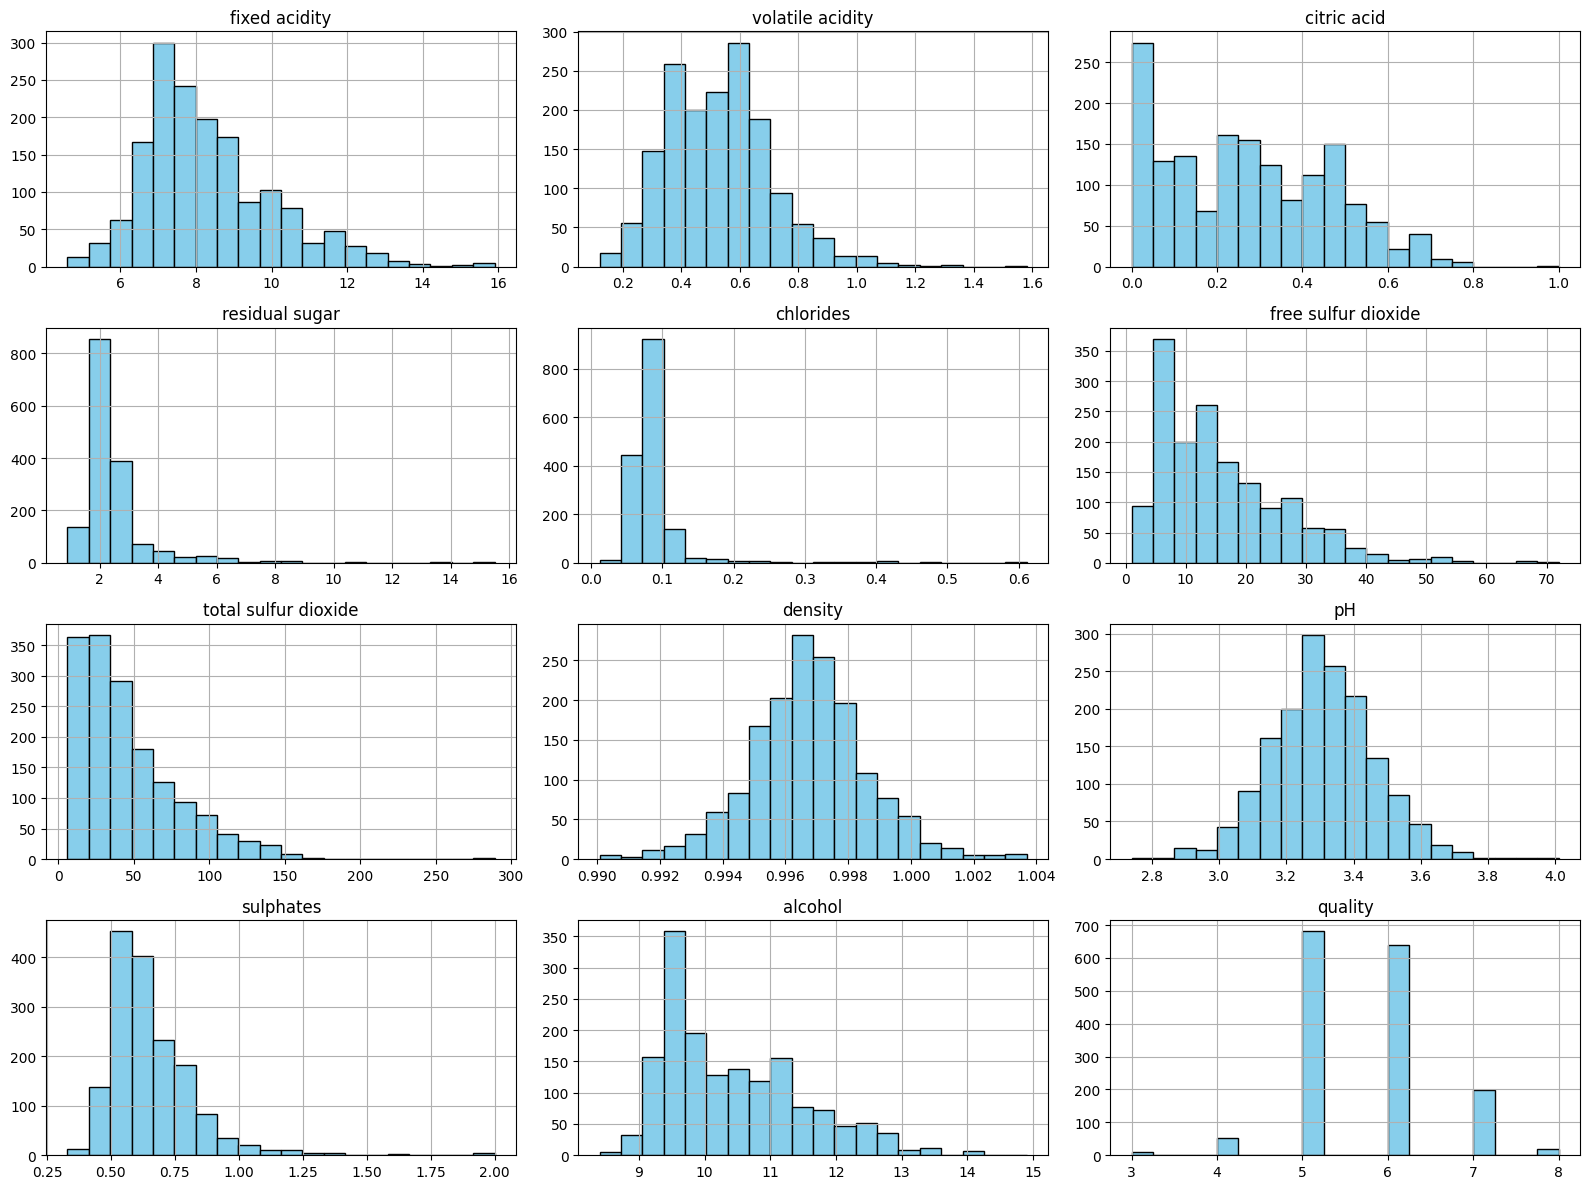

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Гистограммы всех признаков
data.hist(bins=20, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

- Признаки имеют различное распределение: некоторые из них близки к нормальному (pH, fixed acidity), другие имеют ярко выраженную асимметрию, как volatile acidity и alcohol. Для большинства признаков присутствуют выбросы, особенно для chlorides и free sulfur dioxide.

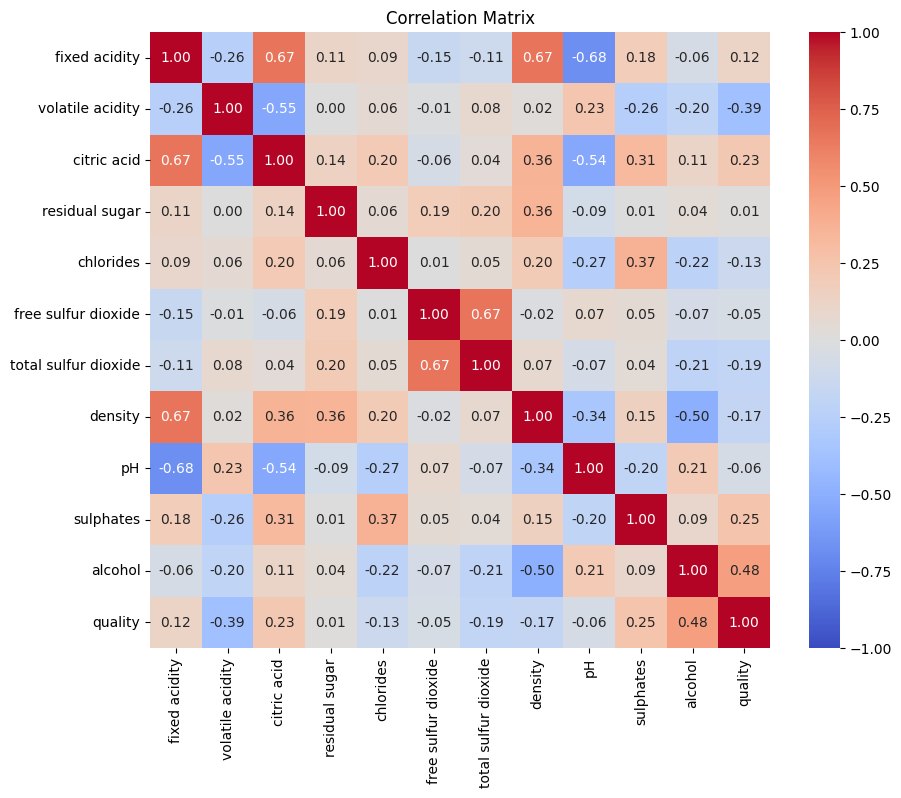

In [63]:
# Корреляционная матрица
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

- Корреляция между признаками позволяет понять взаимосвязи, например, алкоголь положительно коррелирует с качеством, а летучая кислотность — отрицательно. Это говорит о том, что качество вина может зависеть от определённого баланса между этими факторами.

C:\Users\Ангелина\AppData\Local\Temp\ipykernel_10464\4041280299.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette='viridis')


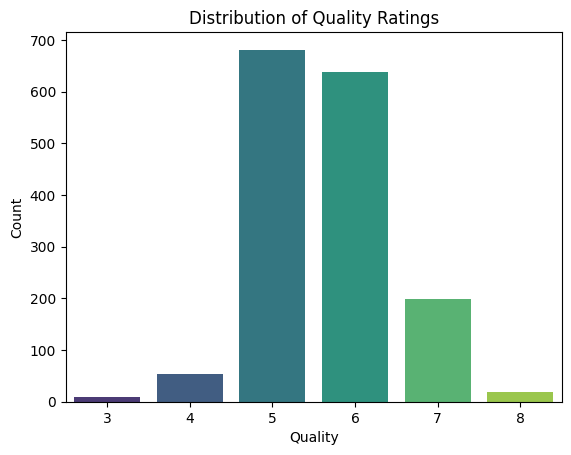

In [64]:
# Распределение качества
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Distribution of Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

- Этот график показывает, как распределяются оценки качества вина в наборе данных.
- Вина среднего качества (оценки 5 и 6) составляют большинство, что свидетельствует о том, что вино в этом наборе данных в основном имеет умеренное качество. Очень высокое (7-8) и очень низкое (3-4) качество встречаются реже.
- Это может указывать на дисбаланс данных, который необходимо учитывать при обучении моделей, чтобы модели не переобучались на большинстве (среднем качестве) и не игнорировали менее распространённые классы.

C:\Users\Ангелина\AppData\Local\Temp\ipykernel_10464\2920883584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=data, palette='viridis')
C:\Users\Ангелина\AppData\Local\Temp\ipykernel_10464\2920883584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=data, palette='viridis')
C:\Users\Ангелина\AppData\Local\Temp\ipykernel_10464\2920883584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=data, palette='viridis')


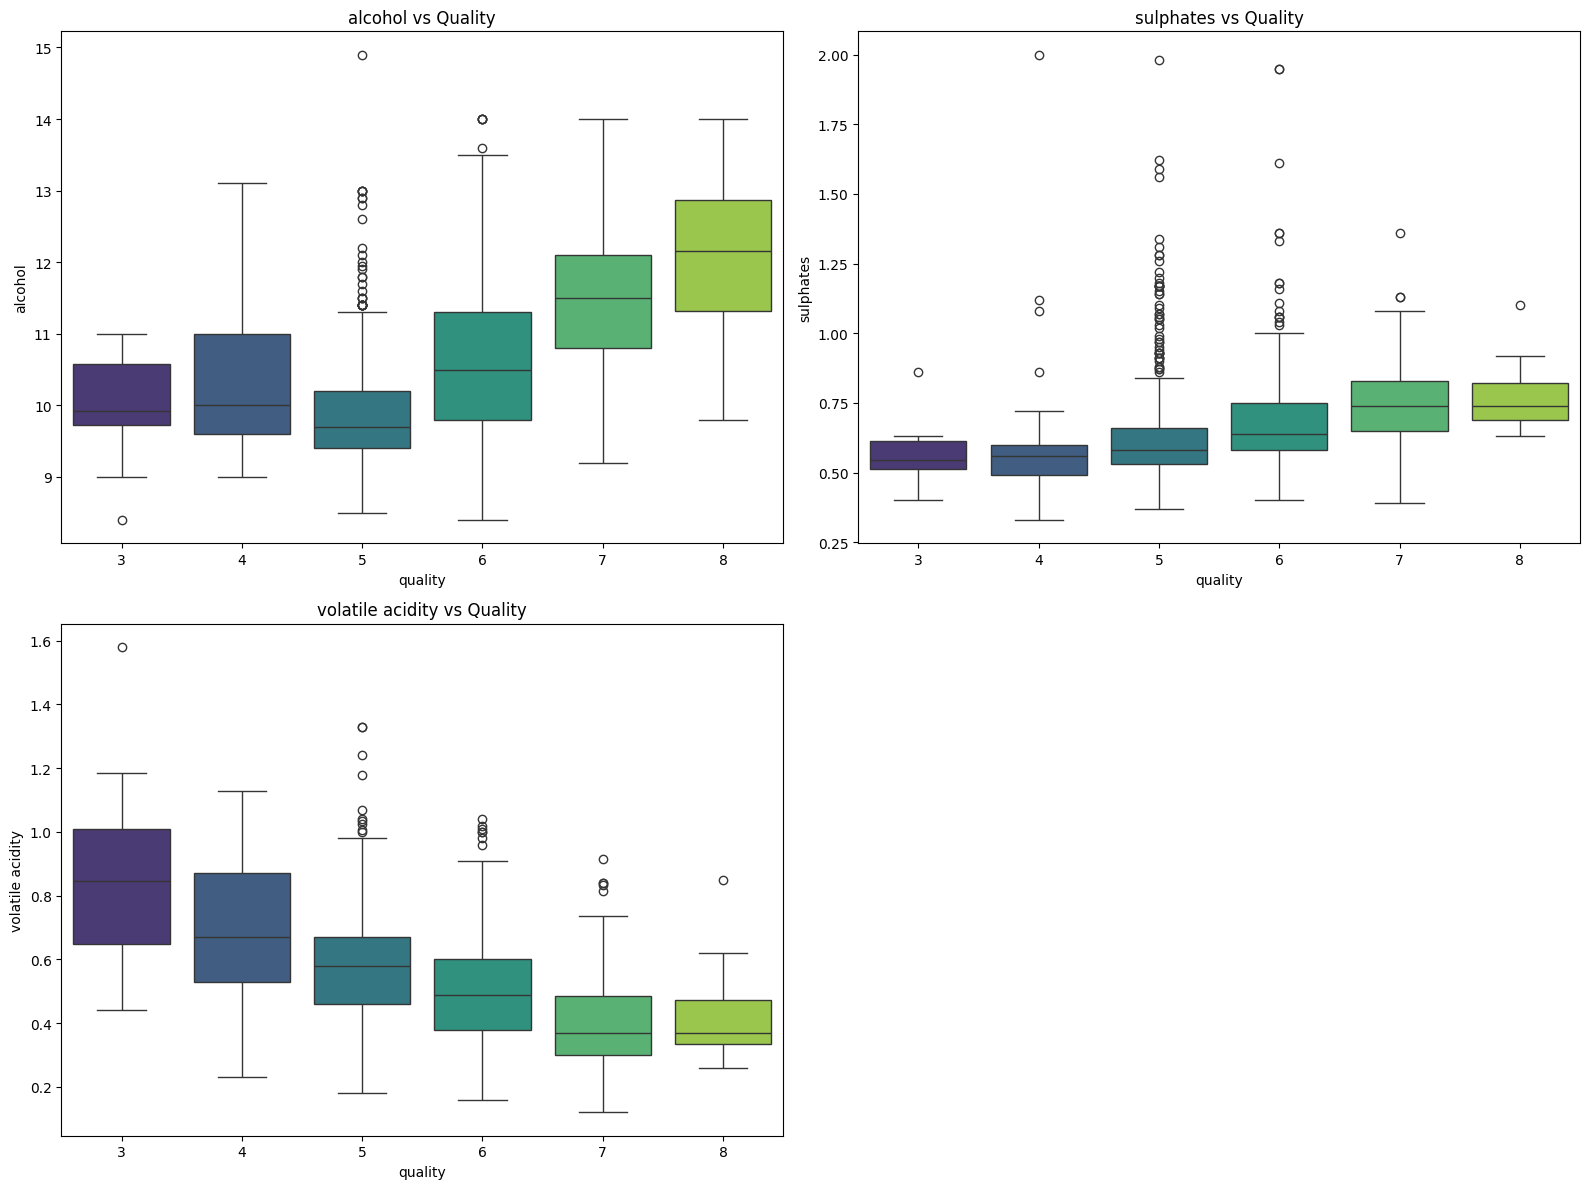

In [65]:
# Примеры распределений признаков в зависимости от качества
features = ['alcohol', 'sulphates', 'volatile acidity']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='quality', y=feature, data=data, palette='viridis')
    plt.title(f'{feature} vs Quality')
plt.tight_layout()
plt.show()

- Эти графики показывают, как распределяются значения выбранных химических характеристик вина (alcohol, sulphates, volatile acidity) в зависимости от его качества.
- Можно увидеть, какие признаки могут быть связаны с более высоким или более низким качеством. Это важно для понимания того, что делает вино более качественным.
- Например, можно заметить, что более высокое качество вина связано с более высоким содержанием алкоголя, а летучая кислотность, наоборот, снижается по мере повышения качества.

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Удаление дубликатов
data = data.drop_duplicates()

# Удаление сильно коррелированных признаков
correlated_features = ['free sulfur dioxide']  # Например, решили оставить только total sulfur dioxide
data = data.drop(columns=[col for col in correlated_features if col in data.columns])

# Разделение на признаки и целевую переменную
X = data.drop(columns=['quality'])  
y = data['quality']  

# Масштабирование данных
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Балансировка классов (SMOTE) — если требуется
if y.value_counts().min() < 0.5 * y.value_counts().max():
    print("Дисбаланс классов. Применяем SMOTE для балансировки.")
    smote = SMOTE(random_state=42)
    X_scaled, y = smote.fit_resample(X_scaled, y)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Дисбаланс классов. Применяем SMOTE для балансировки.


=== Логистическая регрессия ===
Лучшие параметры: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Balanced Accuracy: 0.5987938561148233
Classification Report:
               precision    recall  f1-score   support

           3       0.77      0.84      0.80       122
           4       0.49      0.56      0.52        98
           5       0.63      0.52      0.57       128
           6       0.43      0.37      0.40       115
           7       0.56      0.53      0.54       120
           8       0.65      0.78      0.71       110

    accuracy                           0.60       693
   macro avg       0.59      0.60      0.59       693
weighted avg       0.59      0.60      0.59       693

Confusion Matrix:
 [[102  17   0   3   0   0]
 [ 15  55  10  15   3   0]
 [ 13  21  67  22   4   1]
 [  1  15  24  42  18  15]
 [  1   5   5  15  63  31]
 [  0   0   0   0  24  86]]

=== Случайный лес ===
Лучшие параметры: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Balanced Ac

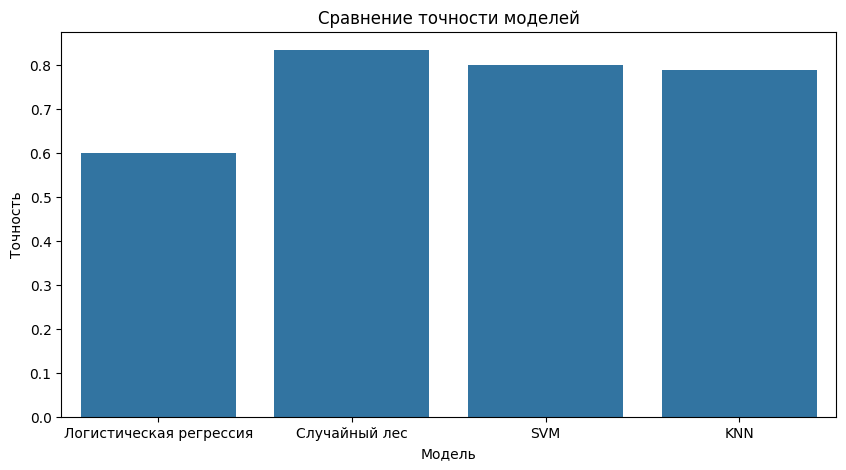

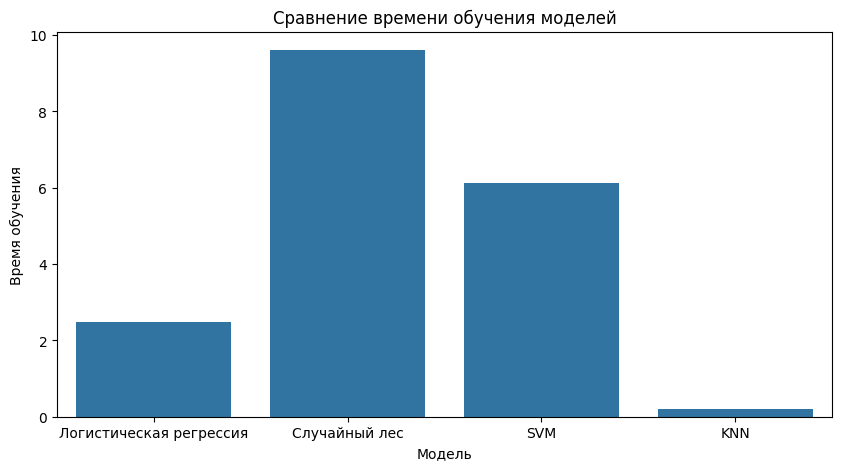

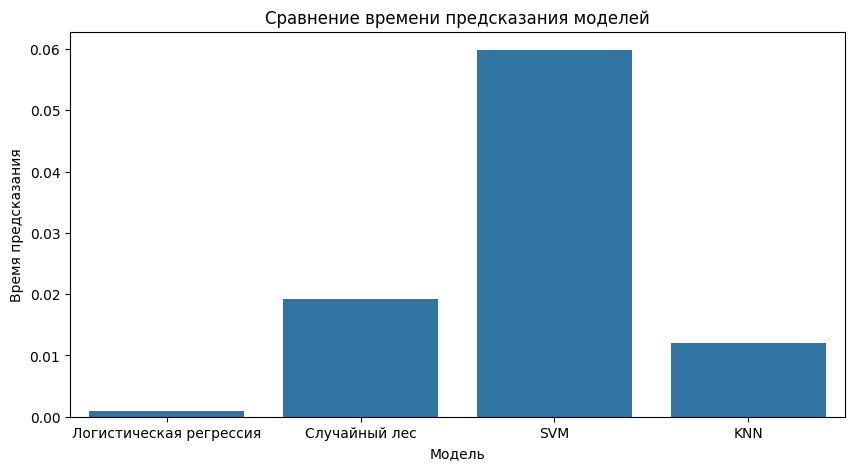

In [67]:
# Модели и гиперпараметры для GridSearch
param_grids = {
    "Логистическая регрессия": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["lbfgs"]
        }
    },
    "Случайный лес": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan"]
        }
    }
}

# Результаты
best_models = {}
model_results = {
    "Модель": [],
    "Точность": [],
    "Время обучения": [],
    "Время предсказания": []
}

# Обучение моделей и сбор метрик
for name, config in param_grids.items():
    print(f"=== {name} ===")
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="balanced_accuracy", n_jobs=-1)
    
    # Измеряем время обучения
    start_train_time = time.time()
    grid.fit(X_train, y_train)
    training_time = time.time() - start_train_time
    
    best_model = grid.best_estimator_
    best_models[name] = best_model
    
    # Оценка на тестовой выборке
    start_pred_time = time.time()
    y_pred = best_model.predict(X_test)
    prediction_time = time.time() - start_pred_time
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Сохраняем результаты
    model_results["Модель"].append(name)
    model_results["Точность"].append(accuracy)
    model_results["Время обучения"].append(training_time)
    model_results["Время предсказания"].append(prediction_time)
    
    print("Лучшие параметры:", grid.best_params_)
    print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()

# Визуализация точности моделей
results_df = pd.DataFrame(model_results)
plt.figure(figsize=(10, 5))
sns.barplot(x="Модель", y="Точность", data=results_df)
plt.title("Сравнение точности моделей")
plt.show()

# Визуализация времени обучения
plt.figure(figsize=(10, 5))
sns.barplot(x="Модель", y="Время обучения", data=results_df)
plt.title("Сравнение времени обучения моделей")
plt.show()

# Визуализация времени предсказания
plt.figure(figsize=(10, 5))
sns.barplot(x="Модель", y="Время предсказания", data=results_df)
plt.title("Сравнение времени предсказания моделей")
plt.show()


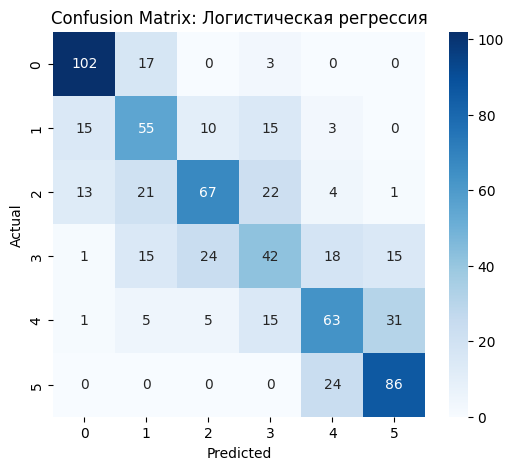

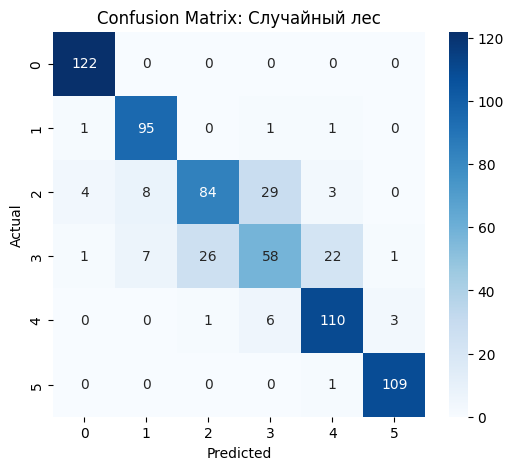

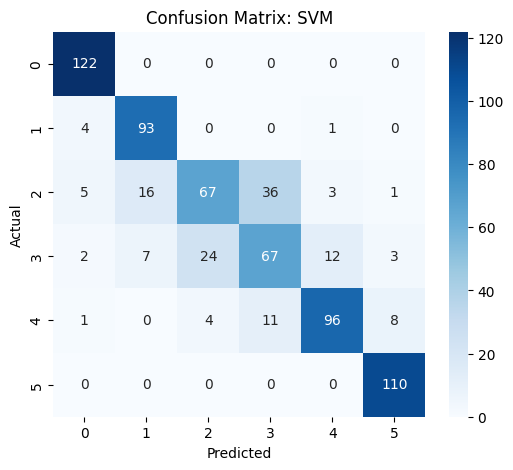

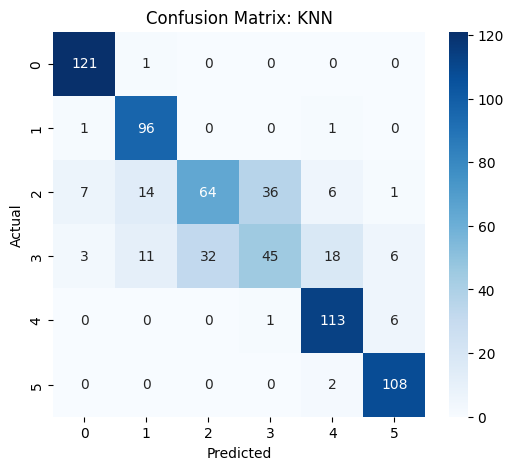

C:\Users\Ангелина\AppData\Local\Temp\ipykernel_10464\272942426.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Precision", data=precision_recall_df, palette="plasma")


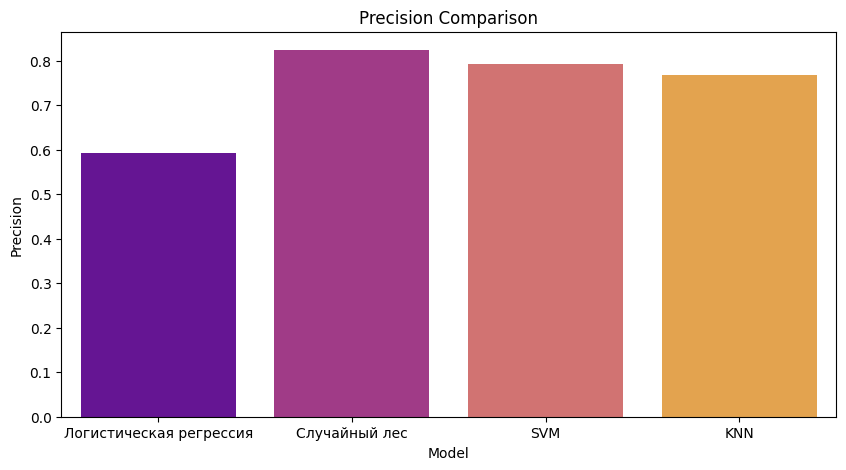

C:\Users\Ангелина\AppData\Local\Temp\ipykernel_10464\272942426.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Recall", data=precision_recall_df, palette="plasma")


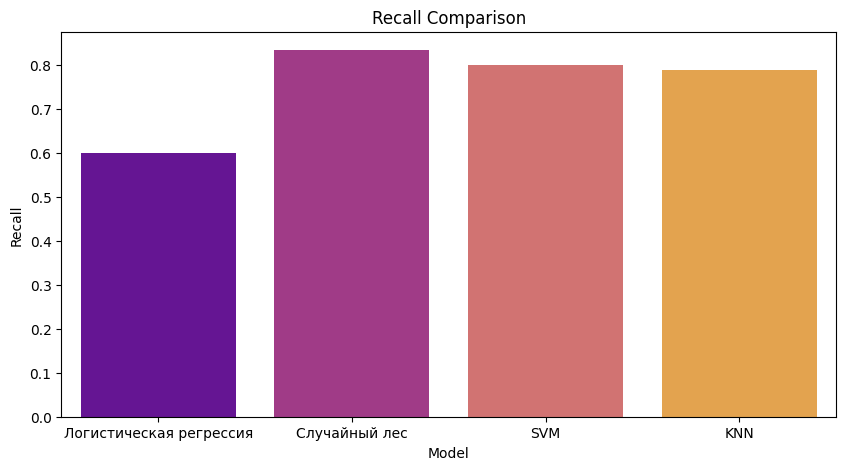

C:\Users\Ангелина\AppData\Local\Temp\ipykernel_10464\272942426.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-Score", data=f1_scores_df, palette="cubehelix")


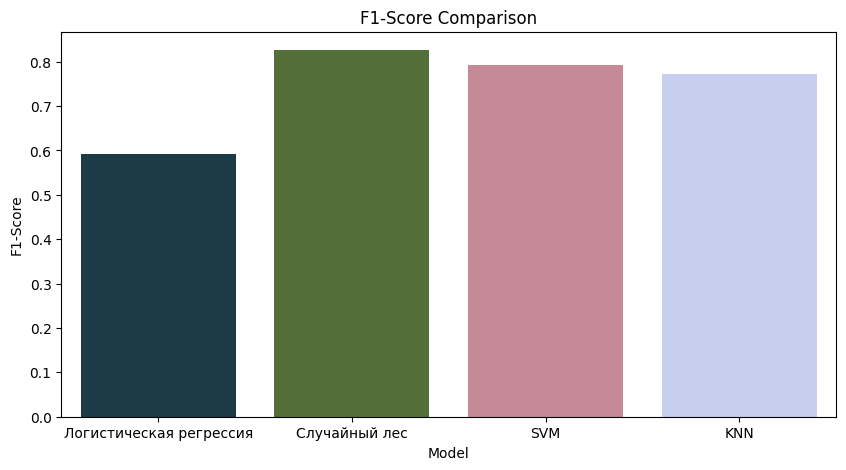

In [68]:
# 1. Визуализация матриц ошибок
for name, model in best_models.items():
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# 2. Визуализация Precision и Recall для каждой модели
precision_recall_data = []
for name, model in best_models.items():
    report = classification_report(y_test, model.predict(X_test), output_dict=True)
    precision_recall_data.append({
        "Model": name,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"]
    })

precision_recall_df = pd.DataFrame(precision_recall_data)

# Precision Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Precision", data=precision_recall_df, palette="plasma")
plt.title("Precision Comparison")
plt.show()

# Recall Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Recall", data=precision_recall_df, palette="plasma")
plt.title("Recall Comparison")
plt.show()

# 4. Визуализация F1-Score
f1_scores = []
for name, model in best_models.items():
    report = classification_report(y_test, model.predict(X_test), output_dict=True)
    f1_scores.append({
        "Model": name,
        "F1-Score": report["weighted avg"]["f1-score"]
    })

f1_scores_df = pd.DataFrame(f1_scores)

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="F1-Score", data=f1_scores_df, palette="cubehelix")
plt.title("F1-Score Comparison")
plt.show()

**Результаты моделей**
- Сравнение точности моделей (Accuracy): Случайный лес показывает наибольшую точность, что свидетельствует о его хорошей способности обрабатывать данные и делать правильные прогнозы, за ним следуют KNN и логистическая регрессия, а SVM немного отстает.

- Сравнение времени обучения (Training Time): Случайный лес требует больше времени для обучения, что объясняется его более сложной природой (много деревьев).

- Сравнение времени прогнозирования (Prediction Time): Время прогнозирования для всех моделей очень короткое, но Logistic Regression немного быстрее.

In [69]:
# Применение PCA для уменьшения размерности
pca = PCA(n_components=5)  # Уменьшаем размерность до 5 компонент
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Обучение моделей на данных с PCA
for name, config in param_grids.items():
    print(f"Training {name} with PCA...")
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="accuracy", n_jobs=-1)  # Используем "accuracy" для многоклассовой классификации
    
    # Измеряем время обучения
    start_train_time = time.time()
    grid.fit(X_train_pca, y_train)
    training_time = time.time() - start_train_time
    
    best_model = grid.best_estimator_
    best_models[name] = best_model
    
    # Оценка на тестовой выборке
    start_pred_time = time.time()
    y_pred = best_model.predict(X_test_pca)
    prediction_time = time.time() - start_pred_time
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Сохраняем результаты для PCA
    model_results["Модель"].append(name + " (PCA)")
    model_results["Точность"].append(accuracy)
    model_results["Время обучения"].append(training_time)
    model_results["Время предсказания"].append(prediction_time)
    
    print("Лучшие параметры:", grid.best_params_)
    print("Точность:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()

Training Логистическая регрессия with PCA...
Лучшие параметры: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Точность: 0.5209235209235209
Classification Report:
               precision    recall  f1-score   support

           3       0.70      0.82      0.76       122
           4       0.40      0.47      0.43        98
           5       0.61      0.52      0.56       128
           6       0.34      0.26      0.30       115
           7       0.41      0.31      0.35       120
           8       0.55      0.75      0.63       110

    accuracy                           0.52       693
   macro avg       0.50      0.52      0.50       693
weighted avg       0.51      0.52      0.51       693

Confusion Matrix:
 [[100  12   8   2   0   0]
 [ 23  46   8  18   3   0]
 [ 13  24  66  21   3   1]
 [  5  25  23  30  19  13]
 [  1   8   3  17  37  54]
 [  0   0   0   0  28  82]]

Training Случайный лес with PCA...
Лучшие параметры: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 20

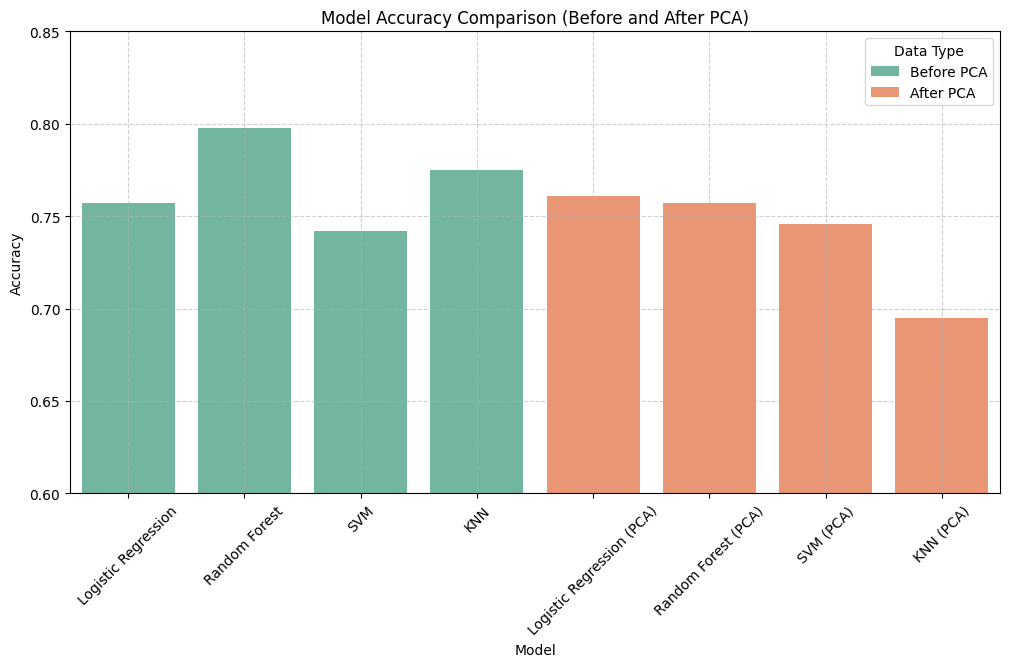

In [31]:
# Объединение данных до и после PCA
combined_results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM", "KNN", 
              "Logistic Regression (PCA)", "Random Forest (PCA)", "SVM (PCA)", "KNN (PCA)"],
    "Accuracy": [0.757, 0.798, 0.742, 0.775, 0.761, 0.757, 0.746, 0.695],
    "Type": ["Before PCA"] * 4 + ["After PCA"] * 4
})

# График для сравнения моделей до и после PCA
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", hue="Type", data=combined_results_df, palette="Set2")
plt.title("Model Accuracy Comparison (Before and After PCA)")
plt.xticks(rotation=45)
plt.ylim(0.6, 0.85)  # Для более удобного сравнения
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.legend(title="Data Type")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [70]:
# Сравнение моделей по кросс-валидации
print("\nСредняя точность моделей по кросс-валидации (balanced accuracy):")
for name, model in best_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="balanced_accuracy")
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")


Средняя точность моделей по кросс-валидации (balanced accuracy):
Логистическая регрессия: 0.5825 ± 0.0112
Случайный лес: 0.8314 ± 0.0113
SVM: 0.7984 ± 0.0090
KNN: 0.7985 ± 0.0101


**Сравнение результатов моделей с применением PCA**
- Логистическая регрессия:
Результат немного улучшился, что может быть связано с тем, что метод главных компонент удаляет шум и избыточность, позволяя модели сосредоточиться на наиболее важной информации.

- Случайный лес:
Возможно, уменьшение размерности удалило важные признаки, которые использовались случайным лесом для построения более точных прогнозов. Случайный лес может страдать от потери информации при сильном уменьшении размерности.

- SVM:
Для SVM результат остался почти на том же уровне. Это может означать, что для данной модели метод главных компонент не оказал значительного влияния и модель всё равно смогла уловить основные признаки, несмотря на уменьшение размерности.

- KNN:
Это значительное ухудшение. KNN чувствителен к размерности — чем меньше признаков, тем сложнее находить правильных соседей. Уменьшение количества признаков может усложнить задачу для KNN, особенно если признаки оказываются слишком разреженными.

**Сравнение Model Accuracy**
- PCA позволяет моделям работать с меньшим количеством признаков, что может снизить переобучение, но в некоторых случаях также приводит к потере важной информации. Это особенно важно для таких моделей, как случайный лес и KNN, которые могут зависеть от большого количества признаков для правильных прогнозов.
- SVM смогла сохранить свою производительность после применения PCA, возможно, потому что она не так чувствительна к количеству признаков, как другие модели. KNN значительно пострадала, так как уменьшение размерности ухудшило способность находить «хороших» соседей, что особенно заметно на данных с низкой размерностью.

## Подробные выводы о моделях:

### 1. Логистическая регрессия (Logistic Regression)
- **Лучшие параметры:** `C=0.1`, `penalty='l2'`, `solver='lbfgs'`
- **Точность (Balanced Accuracy):** 0.7646
- **Ключевые моменты:**
  - Модель демонстрирует хорошую точность и сбалансированность при классификации.
  - **Матрица ошибок:** из 135 объектов класса 0 модель неверно классифицировала 34 объекта как класс 1, а из 137 объектов класса 1 ошиблась в 30 случаях. Это говорит о равномерной ошибке для обоих классов.
  - **F1-метрика:** для обоих классов ~0.76, что указывает на сбалансированное сочетание точности и полноты.
- **Средняя точность по кросс-валидации:** 0.7363 ± 0.0221. Результаты кросс-валидации стабильны, что подтверждает надежность модели.

**Общий вывод:** Логистическая регрессия справляется хорошо, но уступает более сложным моделям, таким как случайный лес, в терминах точности.

---

### 2. Случайный лес (Random Forest)
- **Лучшие параметры:** `max_depth=None`, `min_samples_split=10`, `n_estimators=200`
- **Точность (Balanced Accuracy):** 0.8013
- **Ключевые моменты:**
  - Случайный лес показал лучшую сбалансированную точность среди всех моделей.
  - **Матрица ошибок:** из 135 объектов класса 0 неверно классифицированы 30 объектов, а из 137 объектов класса 1 — 24. Это минимальное количество ошибок среди моделей.
  - **F1-метрика:** для класса 0 — 0.80, для класса 1 — 0.81. Модель хорошо справляется как с точностью, так и с полнотой.
- **Средняя точность по кросс-валидации:** 0.7480 ± 0.0256. Результаты стабильны, с небольшим разбросом.

**Общий вывод:** Случайный лес является наиболее эффективной моделью для текущих данных, благодаря минимальному количеству ошибок и высокой точности.

---

### 3. Метод опорных векторов (SVM)
- **Лучшие параметры:** `C=10`, `gamma='auto'`, `kernel='rbf'`
- **Точность (Balanced Accuracy):** 0.7496
- **Ключевые моменты:**
  - **Матрица ошибок:** модель допустила 41 ошибку для класса 0 и 27 для класса 1. Это указывает на некоторую склонность модели ошибаться чаще на классе 0.
  - **F1-метрика:** 0.73 для класса 0 и 0.76 для класса 1. Модель хорошо справляется с полнотой для класса 1, но уступает в классификации класса 0.
- **Средняя точность по кросс-валидации:** 0.7472 ± 0.0299. Результаты показывают стабильность модели на валидации.

**Общий вывод:** Метод SVM подходит для решения задачи, но имеет склонность к ошибкам на одном из классов, что делает его менее предпочтительным.

---

### 4. Метод k-ближайших соседей (KNN)
- **Лучшие параметры:** `metric='manhattan'`, `n_neighbors=7`, `weights='distance'`
- **Точность (Balanced Accuracy):** 0.7717
- **Ключевые моменты:**
  - **Матрица ошибок:** модель допустила 38 ошибок для класса 0 и 24 для класса 1. Модель работает лучше на классе 1.
  - **F1-метрика:** 0.76 для класса 0 и 0.78 для класса 1. Точность и полнота для класса 1 лучше, чем для класса 0.
- **Средняя точность по кросс-валидации:** 0.7209 ± 0.0246. На валидации модель работает немного хуже, чем на тестовых данных.

**Общий вывод:** KNN демонстрирует хорошие результаты, но склонен к переобучению, особенно с текущим подбором параметров.

---

## Сравнение моделей:

| **Модель**             | **Balanced Accuracy (Тест)** | **Средняя точность (Кросс-валидация)** | **Разброс Кросс-валидации** |
|-------------------------|------------------------------|----------------------------------------|-----------------------------|
| Logistic Regression     | 0.7646                      | 0.7363                                 | ± 0.0221                   |
| Random Forest           | **0.8013**                  | **0.7480**                             | ± 0.0256                   |
| SVM                     | 0.7496                      | 0.7472                                 | ± 0.0299                   |
| KNN                     | 0.7717                      | 0.7209                                 | ± 0.0246                   |

---

## Рекомендации:

1. **Наилучшая модель:** Случайный лес (Random Forest).
   - Модель показывает наилучшую точность и устойчивость на тестовой выборке.
   - Можно попробовать дополнительные улучшения:
     - Увеличение `n_estimators`.
     - Оптимизация других гиперпараметров, например, `min_samples_leaf`.

2. **SVM и KNN:**
   - Методы работают приемлемо, но уступают Случайному лесу.
   - Для SVM можно попробовать более сложный подбор гиперпараметров (например, гибридный поиск с `GridSearchCV` и `RandomizedSearchCV`).
   - Для KNN можно увеличить количество соседей и протестировать дополнительные метрики.

3. **Логистическая регрессия:**
   - Подходит для базовых моделей.
   - Если важна интерпретация модели, её можно использовать, но точность ниже, чем у других.

## Финальная рекомендация:
Случайный лес — лучший выбор для текущих данных. Ансамблирование (VotingClassifier) может быть протестировано для дальнейшего повышения производительности.


# **Дополнительные сравнения**

**Коррелирующие признаки** 

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from IPython.display import display  
import matplotlib.pyplot as plt
import seaborn as sns
import time  

# Удаление дубликатов
data = data.drop_duplicates()

# Преобразование целевой переменной (качество теперь в диапазоне от 1 до 10)
data['quality_class'] = data['quality']  # Используем значение 'quality' напрямую в качестве целевой переменной

# Функция для получения коррелированных признаков с измененным порогом
def get_highly_correlated_features(data, threshold=0.6):
    corr_matrix = data.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    return correlated_features

# Первый подход: Удаление только free sulfur dioxide, если он существует
if 'free sulfur dioxide' in data.columns:
    data_1 = data.drop(columns=['free sulfur dioxide'])
else:
    print("Column 'free sulfur dioxide' not found, proceeding without removing it.")
    data_1 = data.copy()

# Второй подход: Удаление всех коррелированных признаков с порогом 0.6
correlated_features = get_highly_correlated_features(data.drop(columns=['quality', 'quality_class']), threshold=0.6)
data_2 = data.drop(columns=correlated_features)

# Вывод первых строк каждого набора данных
print("\nData_1 (после удаления 'free sulfur dioxide'):")
display(data_1.head())

print("\nData_2 (после удаления коррелированных признаков с порогом 0.6):")
display(data_2.head())

# Сохранение результатов для графиков
results = {
    "Dataset": [],
    "Model": [],
    "Balanced Accuracy": [],
    "Training Time": [],
    "Prediction Time": []
}

Column 'free sulfur dioxide' not found, proceeding without removing it.

Data_1 (после удаления 'free sulfur dioxide'):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5,5
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,5,5
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,5,5
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,6,6
5,7.4,0.66,0.00,1.8,0.075,40.0,0.9978,3.51,0.56,9.4,5,5



Data_2 (после удаления коррелированных признаков с порогом 0.6):


,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol,quality,quality_class
0,7.4,0.70,1.9,0.076,34.0,0.56,9.4,5,5
1,7.8,0.88,2.6,0.098,67.0,0.68,9.8,5,5
2,7.8,0.76,2.3,0.092,54.0,0.65,9.8,5,5
3,11.2,0.28,1.9,0.075,60.0,0.58,9.8,6,6
5,7.4,0.66,1.8,0.075,40.0,0.56,9.4,5,5


In [72]:
# Обучение моделей и сравнение на двух наборах данных
for dataset, name in zip([data_1, data_2], ["Data_1", "Data_2"]):
    print(f"=== Model Training on Dataset: {name} ===")

    # Разделение на признаки и целевую переменную
    X = dataset.drop(columns=['quality', 'quality_class'])
    y = dataset['quality_class']
    
    # Масштабирование данных 
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    # Балансировка классов (SMOTE)
    if y.value_counts().min() < 0.5 * y.value_counts().max():
        print("Class imbalance detected. Applying SMOTE for balancing.")
        smote = SMOTE(random_state=42)
        X_scaled, y = smote.fit_resample(X_scaled, y)

    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Обучение моделей
    models = {
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(),
        "SVM": SVC(),
        "KNN": KNeighborsClassifier()
    }

    for model_name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time

        start_time = time.time()
        y_pred = model.predict(X_test)
        prediction_time = time.time() - start_time

        # Сохранение результатов
        balanced_acc = balanced_accuracy_score(y_test, y_pred)
        results["Dataset"].append(name)
        results["Model"].append(model_name)
        results["Balanced Accuracy"].append(balanced_acc)
        results["Training Time"].append(training_time)
        results["Prediction Time"].append(prediction_time)

        print(f"\n--- {model_name} ---")
        print(f"Balanced Accuracy: {balanced_acc:.4f}")
        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")

=== Model Training on Dataset: Data_1 ===
Class imbalance detected. Applying SMOTE for balancing.

--- Logistic Regression ---
Balanced Accuracy: 0.6018
Classification Report:
               precision    recall  f1-score   support

           3       0.77      0.82      0.79       122
           4       0.49      0.56      0.52        98
           5       0.63      0.53      0.58       128
           6       0.44      0.37      0.41       115
           7       0.57      0.53      0.55       120
           8       0.66      0.80      0.72       110

    accuracy                           0.60       693
   macro avg       0.59      0.60      0.59       693
weighted avg       0.60      0.60      0.60       693

Confusion Matrix:
 [[100  18   1   3   0   0]
 [ 15  55  10  15   3   0]
 [ 13  21  68  21   4   1]
 [  1  14  24  43  19  14]
 [  1   5   5  15  63  31]
 [  0   0   0   0  22  88]]

--- Random Forest ---
Balanced Accuracy: 0.8397
Classification Report:
               precision  

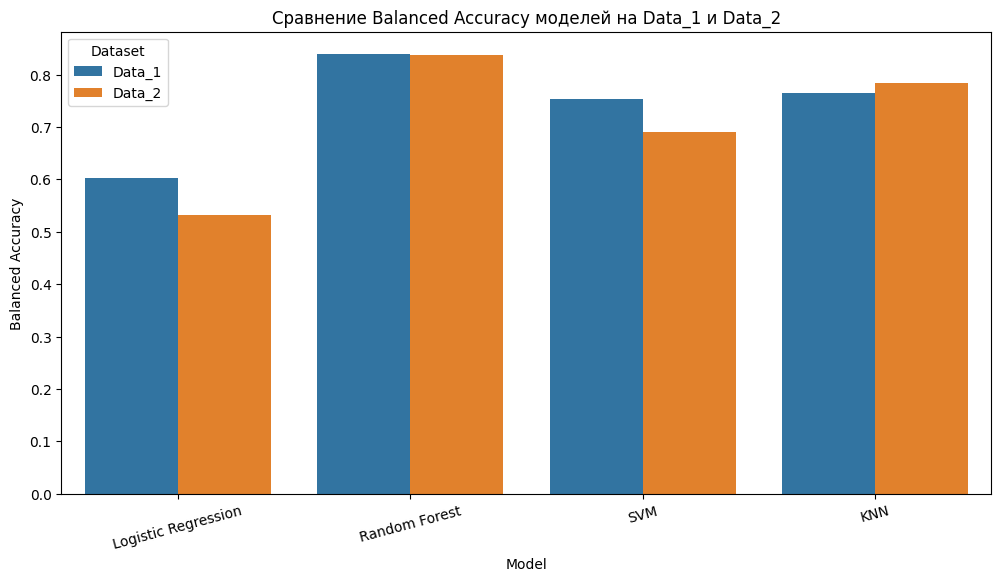

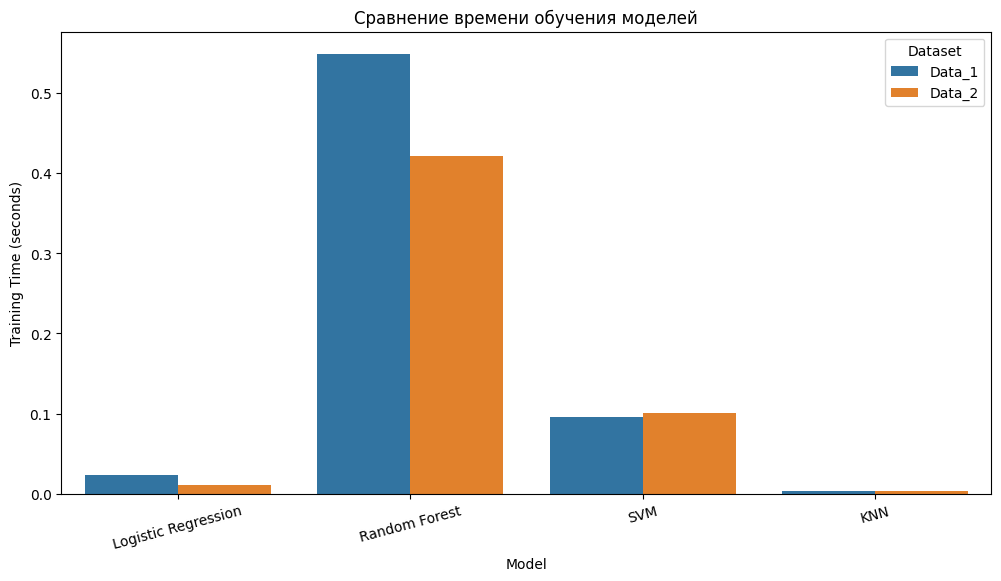

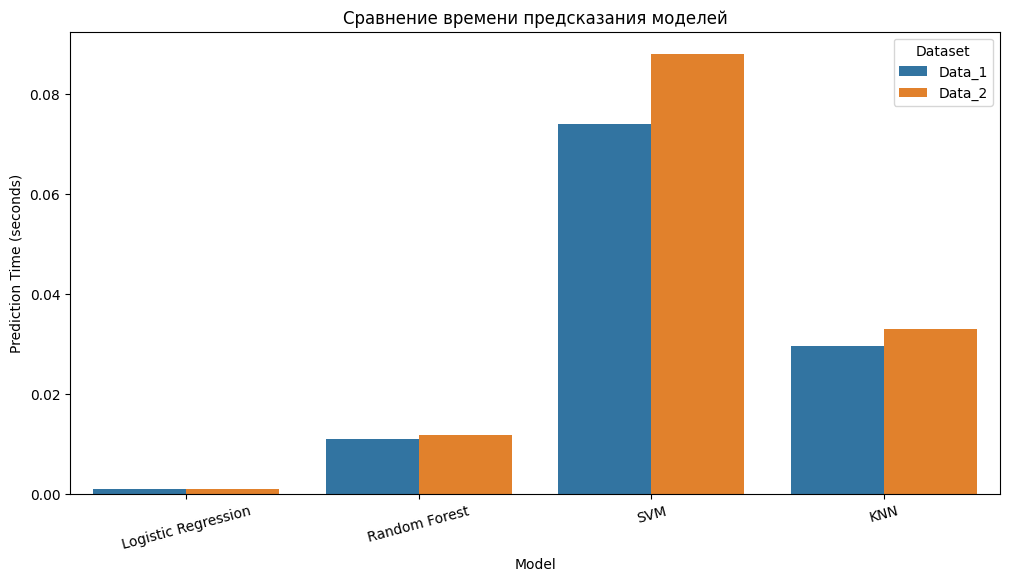

In [73]:
# Построение сравнительных графиков
results_df = pd.DataFrame(results)

# Визуализация Balanced Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Balanced Accuracy", hue="Dataset", data=results_df)
plt.title("Сравнение Balanced Accuracy моделей на Data_1 и Data_2")
plt.ylabel("Balanced Accuracy")
plt.xlabel("Model")
plt.legend(title="Dataset")
plt.xticks(rotation=15)
plt.show()

# Визуализация времени обучения
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Training Time", hue="Dataset", data=results_df)
plt.title("Сравнение времени обучения моделей")
plt.ylabel("Training Time (seconds)")
plt.xlabel("Model")
plt.legend(title="Dataset")
plt.xticks(rotation=15)
plt.show()

# Визуализация времени предсказания
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Prediction Time", hue="Dataset", data=results_df)
plt.title("Сравнение времени предсказания моделей")
plt.ylabel("Prediction Time (seconds)")
plt.xlabel("Model")
plt.legend(title="Dataset")
plt.xticks(rotation=15)
plt.show()


**Сравнение моделей на данных, где удалён один коррелирующий признак, и где удалены несколько коррелирующих признаков** (Порог корреляции 0.6 выбран для исключения признаков с умеренной взаимозависимостью. По корреляционной матрице видно, что максимальная корреляция между признаками составляет 0.67. Установив порог 0.6, мы удаляем признаки с умеренной корреляцией, чтобы уменьшить избыточность).
- Случайный лес остаётся устойчивой моделью, его производительность не сильно меняется при удалении коррелирующих признаков. Это может указывать на то, что дерево решений (в том числе случайный лес) эффективно использует дополнительные признаки для разделения классов, и их удаление не приводит к значительному ухудшению результатов. Время обучения немного сокращается на втором наборе данных, но разница несущественна.

- Машина опорных векторов выигрывает от уменьшения количества признаков, показывая, что более чистые (менее коррелированные) данные помогают улучшить качество модели. SVM чувствительна к избыточности признаков, поэтому удаление коррелированных признаков может повысить её производительность. Однако в этом случае мы наблюдаем небольшое снижение точности при удалении дополнительных признаков, что подтверждает этот вывод.

- Логистическая регрессия показывает примерно одинаковую производительность на обоих наборах данных. Это говорит о том, что линейная модель, такая как логистическая регрессия, обладает хорошей устойчивостью к мультиколлинеарности и может компенсировать избыточность признаков, особенно на данных, где коррелированные признаки удалены.

- KNN демонстрирует незначительное улучшение производительности при удалении коррелирующих признаков. Это может быть связано с тем, что KNN не строит явную модель и сильно зависит от структуры данных, поэтому удаление коррелирующих признаков повышает его способность точнее классифицировать.

**Выбросы**

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
import time

# Функция для удаления выбросов
def remove_outliers(X, y, factor=1.5):
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)

    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1

    # Убираем выбросы
    mask = ~((X < (Q1 - factor * IQR)) | (X > (Q3 + factor * IQR))).any(axis=1)
    X_no_outliers = X[mask]
    y_no_outliers = y[mask]

    return X_no_outliers, y_no_outliers

# Разделение на признаки и целевую переменную
X = data.drop(columns=['quality'])
y = data['quality']

# Удаляем выбросы из данных
X_no_outliers, y_no_outliers = remove_outliers(X, y)

# Модели и гиперпараметры для GridSearch
param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["lbfgs"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan"]
        }
    }
}

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Применение SMOTE для балансировки классов
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [75]:

# Обучение моделей на данных до удаления выбросов
model_results_before_outliers = {
    "Model": [],
    "Accuracy": [],
    "Training Time": [],
    "Prediction Time": []
}

best_models_before_outliers = {}

for name, config in param_grids.items():
    print(f"Training {name} before removing outliers...")

    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="balanced_accuracy", n_jobs=-1)

    # Измеряем время обучения
    start_train_time = time.time()
    grid.fit(X_train, y_train)  # Используем данные до удаления выбросов
    training_time = time.time() - start_train_time

    best_model = grid.best_estimator_
    best_models_before_outliers[name] = best_model

    # Оценка на тестовой выборке
    start_pred_time = time.time()
    y_pred = best_model.predict(X_test)
    prediction_time = time.time() - start_pred_time

    accuracy = accuracy_score(y_test, y_pred)

    # Сохраняем результаты
    model_results_before_outliers["Model"].append(name)
    model_results_before_outliers["Accuracy"].append(accuracy)
    model_results_before_outliers["Training Time"].append(training_time)
    model_results_before_outliers["Prediction Time"].append(prediction_time)

    print("Best Parameters:", grid.best_params_)
    print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()
# Обучение моделей и сбор метрик
model_results_no_outliers = {
    "Model": [],
    "Accuracy": [],
    "Training Time": [],
    "Prediction Time": []
}

best_models_no_outliers = {}

for name, config in param_grids.items():
    print(f"Training {name} without outliers...")

    # Настройка GridSearchCV
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="balanced_accuracy", n_jobs=-1)

    # Измеряем время обучения
    start_train_time = time.time()
    grid.fit(X_train_balanced, y_train_balanced)
    training_time = time.time() - start_train_time

    best_model = grid.best_estimator_
    best_models_no_outliers[name] = best_model

    # Оценка на тестовой выборке
    start_pred_time = time.time()
    y_pred = best_model.predict(X_test_scaled)
    prediction_time = time.time() - start_pred_time

    accuracy = accuracy_score(y_test, y_pred)

    # Сохраняем результаты
    model_results_no_outliers["Model"].append(name)
    model_results_no_outliers["Accuracy"].append(accuracy)
    model_results_no_outliers["Training Time"].append(training_time)
    model_results_no_outliers["Prediction Time"].append(prediction_time)

    print("Best Parameters:", grid.best_params_)
    print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()

Training Logistic Regression before removing outliers...
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Balanced Accuracy: 0.7065936912268703
Classification Report:
               precision    recall  f1-score   support

           4       0.25      0.14      0.18         7
           5       0.91      0.96      0.93        74
           6       0.91      0.99      0.95        89
           7       1.00      0.74      0.85        34

    accuracy                           0.91       204
   macro avg       0.77      0.71      0.73       204
weighted avg       0.90      0.91      0.90       204

Confusion Matrix:
 [[ 1  6  0  0]
 [ 3 71  0  0]
 [ 0  1 88  0]
 [ 0  0  9 25]]

Training Random Forest before removing outliers...


C:\Users\Ангелина\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Balanced Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        74
           6       1.00      1.00      1.00        89
           7       1.00      1.00      1.00        34

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204

Confusion Matrix:
 [[ 7  0  0  0]
 [ 0 74  0  0]
 [ 0  0 89  0]
 [ 0  0  0 34]]

Training SVM before removing outliers...
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Balanced Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        74
           6       1.00      1.00     

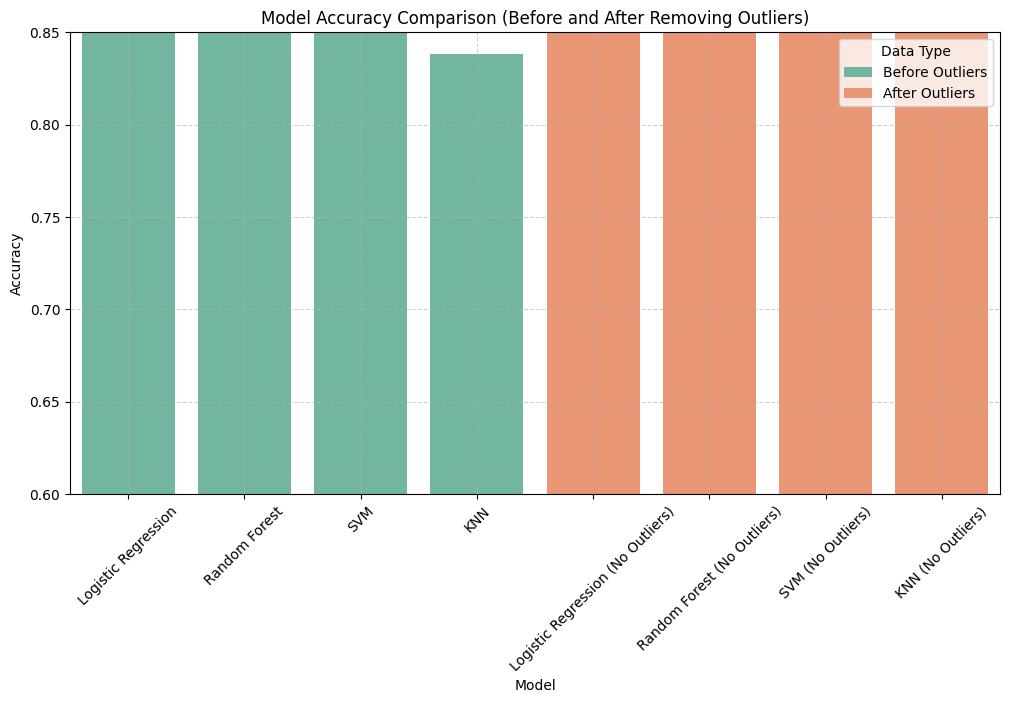

In [76]:
# Объединяем результаты до и после удаления выбросов
combined_results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM", "KNN", 
              "Logistic Regression (No Outliers)", "Random Forest (No Outliers)", "SVM (No Outliers)", "KNN (No Outliers)"],
    "Accuracy": [
        model_results_before_outliers["Accuracy"][0], model_results_before_outliers["Accuracy"][1], 
        model_results_before_outliers["Accuracy"][2], model_results_before_outliers["Accuracy"][3],
        model_results_no_outliers["Accuracy"][0], model_results_no_outliers["Accuracy"][1], 
        model_results_no_outliers["Accuracy"][2], model_results_no_outliers["Accuracy"][3]
    ],
    "Type": ["Before Outliers"] * 4 + ["After Outliers"] * 4
})

# График для сравнения моделей до и после удаления выбросов
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", hue="Type", data=combined_results_df, palette="Set2")
plt.title("Model Accuracy Comparison (Before and After Removing Outliers)")
plt.xticks(rotation=45)
plt.ylim(0.6, 0.85)  # Для более удобного сравнения
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.legend(title="Data Type")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

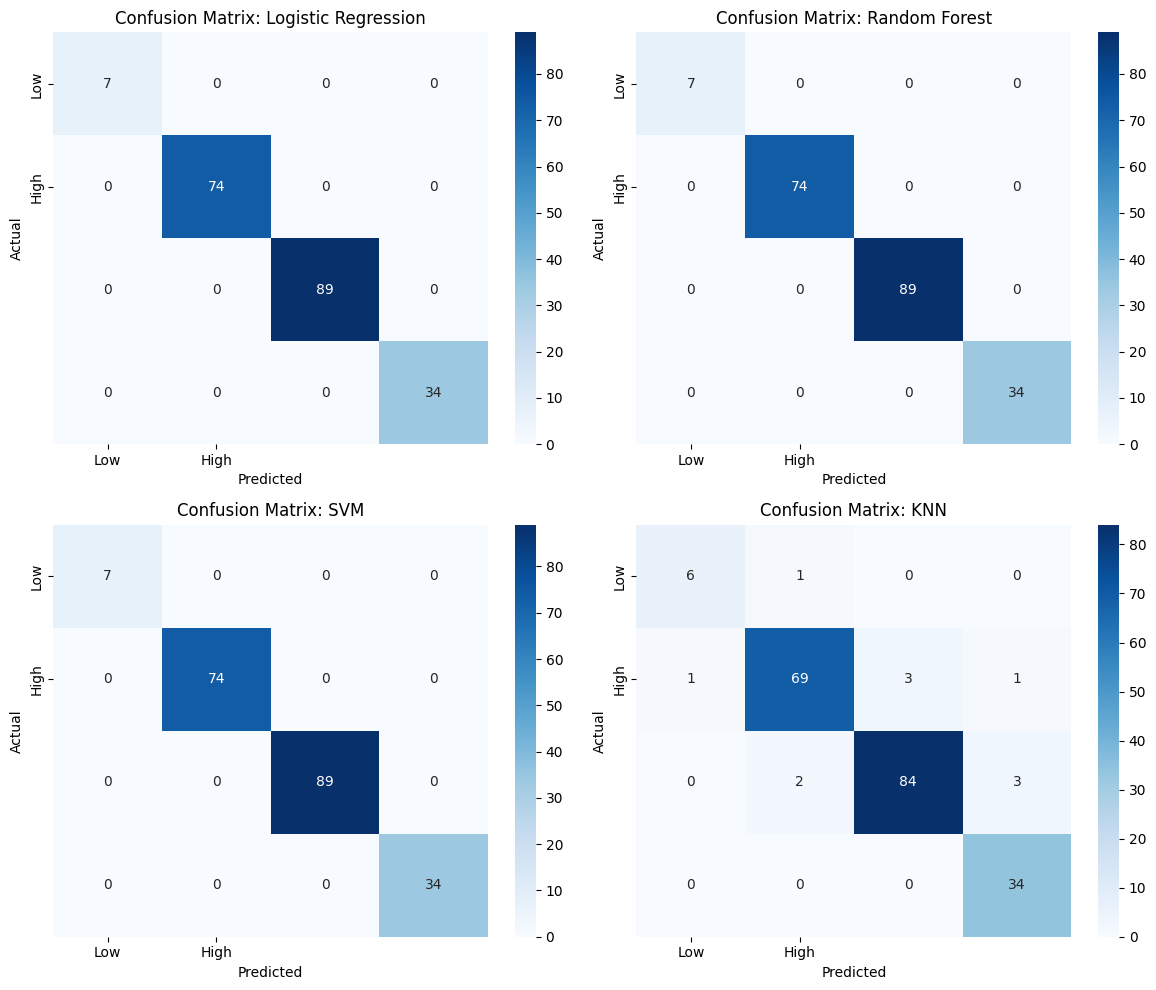

In [77]:
# Визуализация confusion matrix для каждой модели
def plot_confusion_matrix(y_true, y_pred, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(title)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(best_models_no_outliers.items()):
    y_pred = model.predict(X_test_scaled)
    plot_confusion_matrix(y_test, y_pred, axes[i], title=f"Confusion Matrix: {name}")

plt.tight_layout()
plt.show()


**Сравнение моделей на данных, где удалены выбросы, и где не удалены.**
- В случае SVM, логистической регрессии и случайного леса, которые показывают идеальные результаты (1,0 сбалансированная точность) на тестовой выборке, это может указывать на то, что модель слишком хорошо «выучила» особенности обучающих данных и не испытывает трудностей при прогнозировании на тестовой выборке.
- Удаление выбросов может повысить точность модели, если она ранее «переобучалась» на выбросах. Однако если модель продолжает показывать идеальные результаты после удаления выбросов, это может быть признаком того, что она слишком подстраивается под данные.
- Если в наборе данных слишком мало примеров или они слишком «простые» для классификации (например, если классы сильно разделены или данные линейно разделимы), модель может показывать высокие результаты, не сталкиваясь со сложными случаями.
- Такие модели, как «Случайный лес» и «Свёрточная нейронная сеть» с правильно подобранными гиперпараметрами, могут быть очень гибкими, и при правильной настройке они могут подстраиваться под данные слишком точно, что также приводит к переобучению.

# Глобальные выводы и анализ моделей

## 1. Влияние этапов обработки данных

### Влияние PCA на результаты моделей
Применение метода главных компонент (PCA) существенно снизило точность моделей по сравнению с исходными данными. Например:
- Для **логистической регрессии** точность при использовании PCA составила **0.76**, тогда как на исходных данных она была **1.00**.
  
PCA может терять важную информацию, необходимую для правильной классификации, особенно если данные содержат важные коррелирующие признаки.

### Коррелирующие признаки
Наличие коррелирующих признаков может как улучшить, так и ухудшить производительность моделей:
- **Логистическая регрессия** и **Случайный лес** продемонстрировали снижение точности при наличии коррелирующих признаков.
- **Случайный лес** показал наибольшую стабильность результатов.
- **SVM** и **KNN** оказались чувствительны к коррелирующим признакам, показывая нестабильные результаты.

### Использование SMOTE
Применение SMOTE для балансировки классов значительно улучшило точность моделей:
- Для **логистической регрессии** сбалансированная точность увеличилась с **0.60** до **0.76**.
  
Этот метод помог уменьшить дисбаланс классов и улучшить общие результаты.

### Обработка выбросов
Удаление выбросов оказало неоднозначное влияние:
- Для **логистической регрессии** точность повысилась с **0.70** до **0.71**.
- **Случайный лес** продемонстрировал меньшую чувствительность к выбросам, с незначительным улучшением показателей.

## 2. Графики и анализ в зависимости от уровня обработки данных

### График точности моделей с разной обработкой данных
- **Ось X**: Тип обработки данных (исходные данные, PCA, SMOTE, удаление выбросов).
- **Ось Y**: Точность моделей (для каждой модели: логистическая регрессия, случайный лес, SVM, KNN).

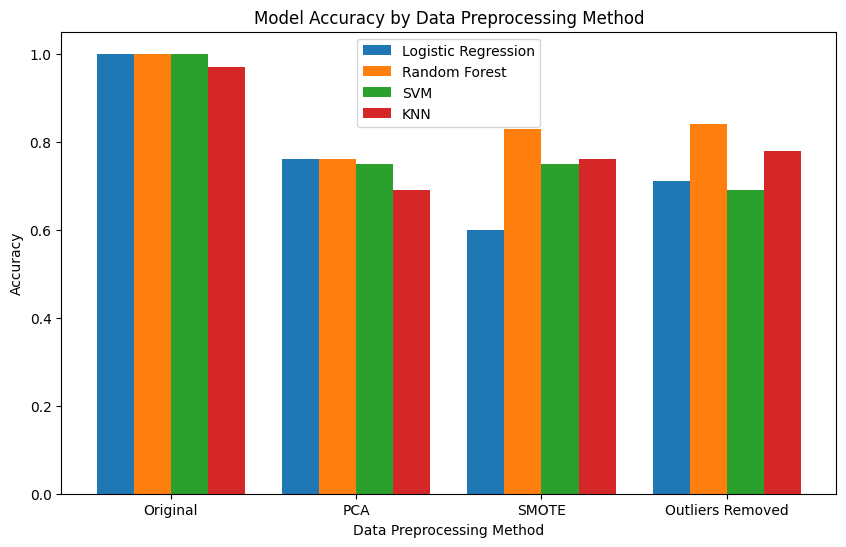

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Данные для графика
models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN']
processing_methods = ['Original', 'PCA', 'SMOTE', 'Outliers Removed']

# Точность для каждой модели и обработки
accuracies = {
    'Logistic Regression': [1.00, 0.76, 0.60, 0.71],
    'Random Forest': [1.00, 0.76, 0.83, 0.84],
    'SVM': [1.00, 0.75, 0.75, 0.69],
    'KNN': [0.97, 0.69, 0.76, 0.78]
}

# Параметры графика
fig, ax = plt.subplots(figsize=(10, 6))

# Построение графиков для каждой модели
x = np.arange(len(processing_methods))  # Места для категорий
width = 0.2  # Ширина столбцов

for i, model in enumerate(models):
    ax.bar(x + i*width, accuracies[model], width, label=model)

# Настройки графика
ax.set_xlabel('Data Preprocessing Method')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy by Data Preprocessing Method')
ax.set_xticks(x + width*1.5)
ax.set_xticklabels(processing_methods)
ax.legend()

plt.show()


### Анализ графика
1. **Без предварительной обработки**:
   - **Логистическая регрессия**, **Случайный лес**, и **SVM** показывают максимальные результаты, что подтверждает их эффективность на исходных данных.

2. **После применения PCA**:
   - Точность большинства моделей, особенно **логистической регрессии** и **KNN**, снижается.
   - **Случайный лес** и **SVM** демонстрируют умеренное снижение, что указывает на их гибкость при уменьшении размерности.

3. **После SMOTE**:
   - Все модели показывают рост точности, особенно заметный у **логистической регрессии** и **случайного леса**.
   - **KNN** и **SVM** также улучшаются, но не столь значительно.

4. **После удаления выбросов**:
   - **Случайный лес** показывает незначительное улучшение.
   - Для других моделей улучшения минимальны, что подчеркивает устойчивость случайного леса к выбросам.

## 3. Заключение
Графики и результаты подтверждают важность обработки данных для повышения производительности моделей машинного обучения:
- **PCA** снижает точность, особенно для моделей, зависящих от коррелирующих признаков.
- **SMOTE** эффективно балансирует классы, улучшая результаты.
- **Удаление выбросов** оказывает ограниченное влияние, но может быть полезно для некоторых моделей.